In [2]:
import pandas as pd
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df = pd.read_csv("Medicine_Details.csv")
df.head()


,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [4]:
df.columns = df.columns.str.lower()
df["medicine name"] = df["medicine name"].str.strip()
df["composition"] = df["composition"].str.strip()
df["uses"] = df["uses"].str.strip()
print(df.isnull().sum())


medicine name         0
composition           0
uses                  0
side_effects          0
image url             0
manufacturer          0
excellent review %    0
average review %      0
poor review %         0
dtype: int64


In [5]:
# Example of fuzzy matching
medicine_name = "Azithral 500"
medicine_names = df["medicine name"].tolist()

best_match = process.extractOne(medicine_name, medicine_names, scorer=fuzz.token_sort_ratio)
print(f"Best match for '{medicine_name}': {best_match}")

Best match for 'Azithral 500': ('Azithral 500 Tablet', 77)


In [6]:
# Save preprocessed data (optional)
df.to_csv("Preprocessed_Medicine_Details.csv", index=False)

In [7]:
df.tail()

,medicine name,composition,uses,side_effects,image url,manufacturer,excellent review %,average review %,poor review %
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [8]:
df.columns

Index(['medicine name', 'composition', 'uses', 'side_effects', 'image url',
       'manufacturer', 'excellent review %', 'average review %',
       'poor review %'],
      dtype='object')

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load and preprocess dataset
df = pd.read_csv("Medicine_Details.csv")
df.columns = df.columns.str.lower().str.strip()  # Normalize column names
df.fillna("", inplace=True)  # Replace NaN with an empty string

# Combine relevant columns for better context
df['combined_text'] = (
    df['medicine name'] + " " + 
    df['composition'] + " " + 
    df['uses'] + " " + 
    df['side_effects'] + " " + 
    df['manufacturer'] + " " + 
    df['excellent review %'].astype(str) + " " + 
    df['average review %'].astype(str) + " " + 
    df['poor review %'].astype(str)
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

# Save the model
joblib.dump((vectorizer, tfidf_matrix, df), "medicine_search_model.joblib")
print("Model trained and saved as medicine_search_model.joblib.")


Model trained and saved as medicine_search_model.joblib.


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import joblib

# Load the saved model
vectorizer, tfidf_matrix, df = joblib.load("medicine_search_model.joblib")

# Test with a sample query
query = "Azithral 500"
query_vector = vectorizer.transform([query])

# Compute cosine similarity
cosine_sim = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Get top 5 similar medicines
top_indices = cosine_sim.argsort()[-5:][::-1]
for i in top_indices:
    print(f"Medicine: {df.iloc[i]['medicine name']}, Similarity: {cosine_sim[i]:.2f}")


Medicine: Azithral 500 Tablet, Similarity: 0.58
Medicine: Azithral KidTab, Similarity: 0.40
Medicine: Azithral Eye Drop, Similarity: 0.40
Medicine: Azithral-XL 100 Liquid, Similarity: 0.39
Medicine: Azithral 100 Liquid, Similarity: 0.39


In [11]:
import streamlit as st
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import matplotlib.pyplot as plt

# Load the saved model
vectorizer, tfidf_matrix, df = joblib.load("medicine_search_model.joblib")

# Streamlit App
st.title("Medicine Search and Evaluation")
st.write("Search for medicines and evaluate Precision@K.")

# Input query
query = st.text_input("Enter medicine name:", value="Azithral 500")

# Number of top results to display
k = st.slider("Select the number of similar medicines to display:", min_value=1, max_value=10, value=5)

if st.button("Search and Evaluate"):
    # Vectorize the query
    query_vector = vectorizer.transform([query])
    
    # Compute cosine similarity
    cosine_sim = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    # Get top K similar medicine indices
    top_indices = cosine_sim.argsort()[-k:][::-1]
    
    # Retrieve the top medicines
    top_medicines = df.iloc[top_indices][["medicine name", "composition", "uses", "side_effects", "manufacturer"]]
    top_medicines["Similarity Score"] = cosine_sim[top_indices]
    
    st.subheader(f"Top {k} Similar Medicines")
    st.dataframe(top_medicines)

    # Ground truth for evaluation (for example purposes, you can modify this)
    relevant_medicines = ["Azithral 500", "Azithromycin 500", "Azimax 500", "Azibact 500", "Zithromax 500"]
    
    # Calculate Precision@K
    relevant_count = sum(1 for med in top_medicines["medicine name"] if med in relevant_medicines)
    precision_at_k = relevant_count / k

    st.subheader("Evaluation: Precision@K")
    st.write(f"Precision@{k}: **{precision_at_k:.2f}**")
    
    # Plot Precision@K
    fig, ax = plt.subplots()
    ax.bar(["Relevant", "Non-Relevant"], [relevant_count, k - relevant_count], color=["green", "red"])
    ax.set_title(f"Precision@{k} Evaluation")
    st.pyplot(fig)


2025-04-08 19:14:25.924 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:26.071 
  command:

    streamlit run C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-08 19:14:26.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:26.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:26.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:26.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:26.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:26.077 Threa

In [12]:
import joblib
df = joblib.load("C:/6th sem project/Medicine/medicine_search_model.joblib")


In [13]:
import streamlit as st
import pandas as pd
import joblib
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Load dataset
file_path = "C:/6th sem project/Medicine/Medicine_Details.csv"
df = pd.read_csv(file_path)

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Check if 'medicine name' exists
if "medicine name" not in df.columns:
    st.error(f"Column names found: {df.columns}")
    st.stop()

# User Input
medicine_name_input = st.text_input("Enter Medicine Name", "")

def search_medicine(name, top_n=5):
    if name.strip() == "":
        return []
    medicine_names = df["medicine name"].dropna().tolist()
    matches = process.extract(name, medicine_names, limit=top_n, scorer=fuzz.token_sort_ratio)
    return [df[df["medicine name"] == match[0]] for match in matches if match[1] > 50]

if medicine_name_input:
    results = search_medicine(medicine_name_input)
    if results:
        st.subheader(f"Results for '{medicine_name_input}':")
        for result in results:
            medicine_name = result.iloc[0]["medicine name"]
            st.write(f"**{medicine_name}**")
            st.write(f"**Uses:** {result.iloc[0]['uses']}")
            image_url = result.iloc[0].get("image url", "")
            if pd.notna(image_url):
                st.image(image_url, caption=f"Image of {medicine_name}", use_column_width=True)
    else:
        st.write("No matching medicines found.")


2025-04-08 19:14:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 19:14:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [15]:
df.columns = df.columns.str.strip()  # remove leading/trailing spaces
df.columns = df.columns.str.replace('\n', '')  # remove line breaks
df.columns = df.columns.str.replace(r'[^\x00-\x7F]+', '', regex=True)  # remove non-ASCII characters
print(df.columns)


Index(['medicine name', 'composition', 'uses', 'side_effects', 'image url',
       'manufacturer', 'excellent review %', 'average review %',
       'poor review %'],
      dtype='object')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1784\1439186826.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='medicine name', y='excellent review %', data=top_medicines, palette='viridis')


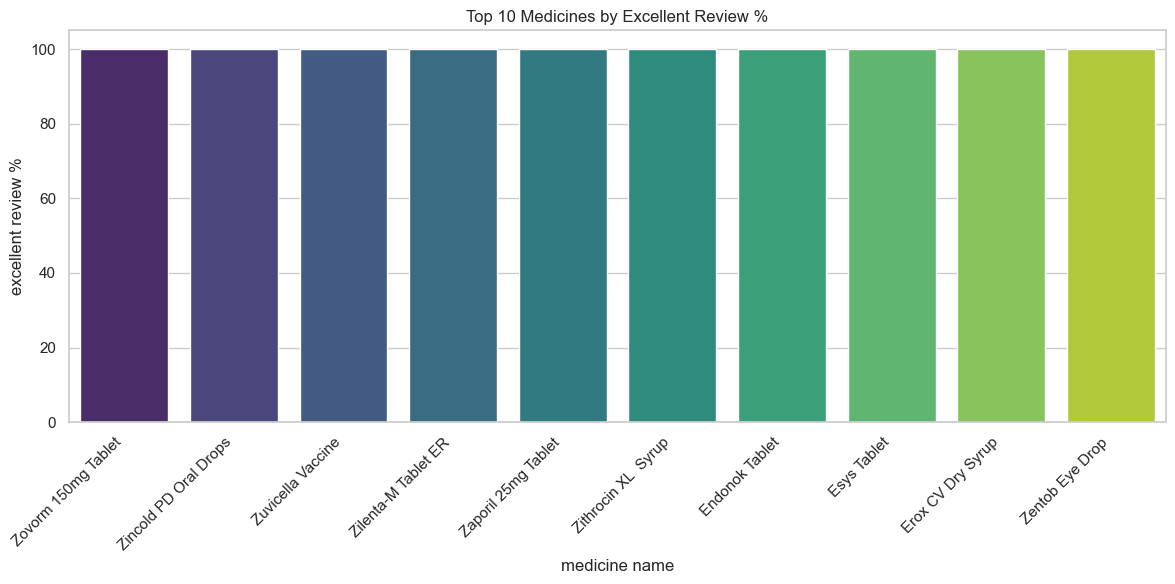

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Top 10 medicines by excellent review %
top_medicines = df.sort_values(by='excellent review %', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='medicine name', y='excellent review %', data=top_medicines, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Medicines by Excellent Review %')
plt.tight_layout()
plt.show()


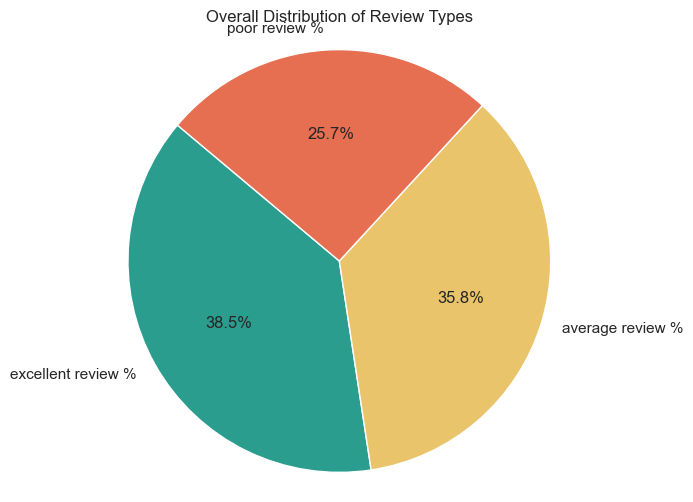

In [18]:
# Summing review categories
review_totals = df[['excellent review %', 'average review %', 'poor review %']].sum()

plt.figure(figsize=(6, 6))
plt.pie(review_totals, labels=review_totals.index, autopct='%1.1f%%', startangle=140, colors=['#2a9d8f', '#e9c46a', '#e76f51'])
plt.title('Overall Distribution of Review Types')
plt.axis('equal')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1784\541376909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='Purples')


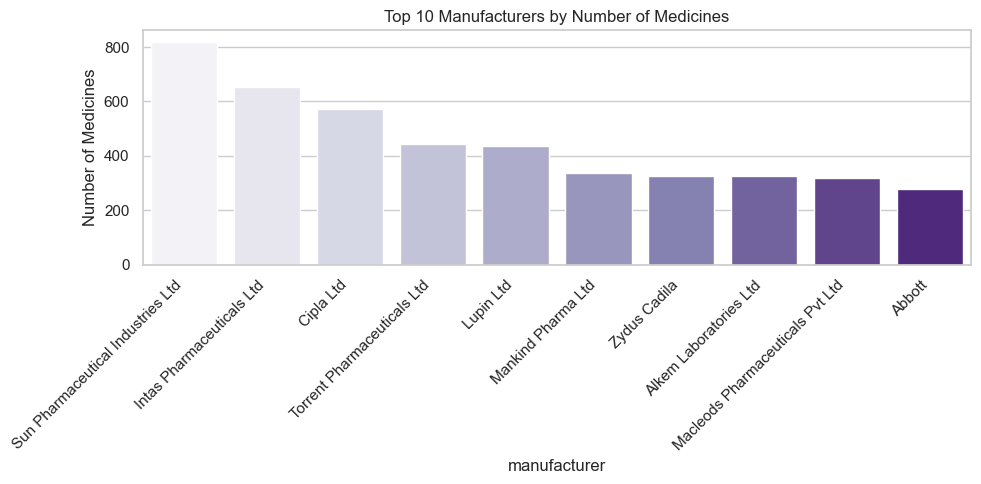

In [21]:
top_manufacturers = df['manufacturer'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette='Purples')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Medicines")
plt.title("Top 10 Manufacturers by Number of Medicines")
plt.tight_layout()
plt.show()


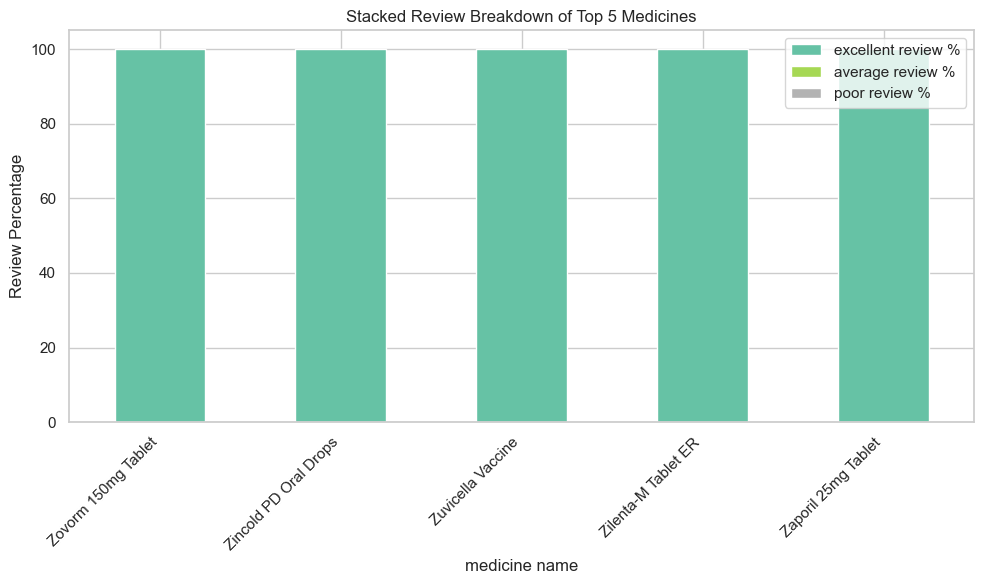

In [22]:
top_meds = df.sort_values(by='excellent review %', ascending=False).head(5)

top_meds.set_index('medicine name')[['excellent review %', 'average review %', 'poor review %']].plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.ylabel("Review Percentage")
plt.title("Stacked Review Breakdown of Top 5 Medicines")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
